In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import random
import pandas as pd
from sklearn import datasets

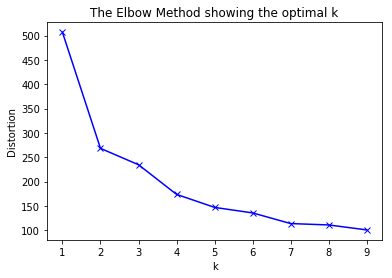

In [4]:
from scipy.spatial.distance import cdist
distortions = []
cancer = datasets.load_breast_cancer()
X=cancer.data
Y=cancer.target
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [5]:
Y[Y == 0] = -1

per=(Y.shape[0])*(20/100) #20% data will be mislabeled

k=random.sample(range(Y.shape[0]), int(per)) #list of index no. of mislabeled data
Y=np.array(Y)
for i in k:
    if Y[i-1]==1:
        Y[i-1]=-1;
    else:
        Y[i-1]=1

In [6]:
kmeanModel = KMeans(n_clusters=5).fit(X)

In [7]:
cluster1=kmeanModel.labels_
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
i1=[]
i2=[]
i3=[]
i4=[]
i5=[]
for i in range(len(cluster1)):
    if cluster1[i]==0:
        y1.append(Y[i])
        x1.append(X[i])
        i1.append(i)
    elif cluster1[i]==1:
        y2.append(Y[i])
        x2.append(X[i])
        i2.append(i)
    elif cluster1[i]==2:
        y3.append(Y[i])
        x3.append(X[i])
        i3.append(i)
    elif cluster1[i]==3:
        y4.append(Y[i])
        x4.append(X[i])
        i4.append(i)
    else:
        y5.append(Y[i])
        x5.append(X[i])
        i5.append(i)
    
    

In [13]:
x1=np.array(x1)
y1=np.array(y1)
x2=np.array(x2)
y2=np.array(y2)
x3=np.array(x3)
y3=np.array(y3)
x4=np.array(x4)
y4=np.array(y4)
x5=np.array(x5)
y5=np.array(y5)
weight_list1=[]
weight_list2=[]
weight_list3=[]
weight_list4=[]
weight_list5=[]
weight_listh=[]
weight_list1=np.reshape(i1,(len(i1),1))
weight_list2=np.reshape(i2,(len(i2),1))
weight_list3=np.reshape(i3,(len(i3),1))
weight_list4=np.reshape(i4,(len(i4),1))
weight_list5=np.reshape(i5,(len(i5),1))

In [14]:
# print(weight_list1)

In [22]:
from builtins import range, input
import random
from sklearn.model_selection import train_test_split
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import datasets
import import_ipynb
from sklearn import metrics


from sklearn.linear_model import LogisticRegression

class AdaBoost:
  def __init__(self, M):
    self.M = M

  def fit(self, X, Y):
    self.models = []
    self.alphas = []

    N = X.shape[0]
    W = np.ones(N) / N

    for m in range(self.M):
      tree = LogisticRegression()
      tree.fit(X,Y,sample_weight=W)
      P = tree.predict(X)

      err = W.dot(P != Y)
      alpha = 0.5*(np.log(1 - err) - np.log(err))

      W = W*np.exp(-alpha*Y*P) # vectorized form
      W = W / W.sum() # normalize so it sums to 1
      weight_list1.append(W)

      self.models.append(tree)
      self.alphas.append(alpha)

  def predict(self, X):
    # NOT like SKLearn API
    # we want accuracy and exponential loss for plotting purposes
    N, _ = X.shape
    FX = np.zeros(N)
    for alpha, tree in zip(self.alphas, self.models):
      FX += alpha*tree.predict(X)
    return np.sign(FX), FX

  def score(self, X, Y):
    # NOT like SKLearn API
    # we want accuracy and exponential loss for plotting purposes
    P, FX = self.predict(X)
    L = np.exp(-Y*FX).mean()
    return np.mean(P == Y), L






if __name__ == '__main__':
    itr=3
    model = AdaBoost(itr)
    model.fit(x1,y1)



/home/balram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/balram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/balram/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
weight_list1[0][4]

46

In [ ]:
weight_list=np.array(weight_list1)

#observing the wieght of instances
#print(wieght_list)
a=len(weight_list)

#sorting data and finding mean
nm=[] 
#nm=np.mean(weight_list, axis=0)
nm=np.array(weight_list[itr-1])
#print(nm)
#ba=len(nm)
Q=[]
x=[]
#print(a)
for i in range(a):
    x=[i,nm[i]]
    Q.append(x)
    x=[]
#print(Q)
Q.sort(key = lambda Q: Q[1]) 



id1=[]
for i in range(y1.shape[0]):
    id1.append(i)

id_m1=[]
mis1=[]
for i in range(x1.shape[0]):
    if weight_list1[0][i] in k:
        mis1.append(weight_list1[itr][i])
        id_m1.append(i)

        
id2=[]
for i in range(y2.shape[0]):
    id2.append(i)

id_m2=[]
mis2=[]
for i in range(x2.shape[0]):
    if weight_list2[0][i] in k:
        mis2.append(weight_list2[itr][i])
        id_m2.append(i)
        
        
id3=[]
for i in range(y3.shape[0]):
    id3.append(i)

id_m3=[]
mis3=[]
for i in range(x3.shape[0]):
    if weight_list3[0][i] in k:
        mis3.append(weight_list3[itr][i])
        id_m3.append(i)
        
id4=[]
for i in range(y4.shape[0]):
    id4.append(i)

id_m4=[]
mis4=[]
for i in range(x4.shape[0]):
    if weight_list4[0][i] in k:
        mis4.append(weight_list4[itr][i])
        id_m4.append(i)
    
    

In [13]:
weight_list1[itr]

array([0.00498564, 0.00278802, 0.00707541, 0.00498564, 0.00395664,
       0.00498564, 0.00278802, 0.00498564, 0.00707541, 0.00498564,
       0.00278802, 0.00498564, 0.00278802, 0.00395664, 0.00395664,
       0.00395664, 0.00707541, 0.00278802, 0.00395664, 0.0036323 ,
       0.00395664, 0.0036323 , 0.00278802, 0.00395664, 0.00395664,
       0.00395664, 0.0036323 , 0.00395664, 0.00707541, 0.0036323 ,
       0.00395664, 0.00395664, 0.00707541, 0.00278802, 0.00649541,
       0.00498564, 0.00498564, 0.00707541, 0.00395664, 0.00278802,
       0.00278802, 0.00543082, 0.00707541, 0.00498564, 0.00543082,
       0.0036323 , 0.00278802, 0.00498564, 0.00498564, 0.00278802,
       0.00278802, 0.00498564, 0.0036323 , 0.00543082, 0.00278802,
       0.00707541, 0.00498564, 0.00707541, 0.00278802, 0.00707541,
       0.00395664, 0.00278802, 0.00707541, 0.00278802, 0.00707541,
       0.00498564, 0.00278802, 0.00278802, 0.00278802, 0.00278802,
       0.00278802, 0.00498564, 0.00498564, 0.00395664, 0.00278

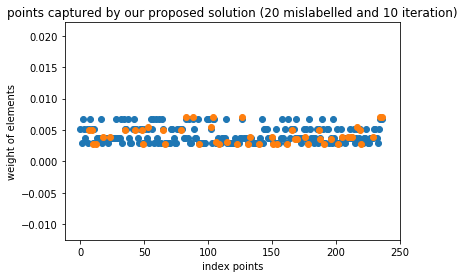

3


In [14]:
plt.scatter(id1,nm)
plt.scatter(id_m1,mis1)
plt.xlabel("index points")
plt.ylabel("weight of elements")
plt.title("points captured by our proposed solution (20 mislabelled and 10 iteration)")
plt.show()

print(itr)

In [ ]:
plt.scatter(id2,nm)
plt.scatter(id_m2,mis2)
plt.xlabel("index points")
plt.ylabel("weight of elements")
plt.title("points captured by our proposed solution (20 mislabelled and 10 iteration)")
plt.show()

In [15]:
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    
    if (a_set & b_set): 
        wq=a_set & b_set 
    else: 
        print("No common elements")  
    return wq

In [ ]:
wq=common_member(k,ind)
print(len(wq))

In [90]:
print(len(k))

668


In [91]:
print(len(ind))

3340


In [92]:
print(len(Xtrain))
Xtrain=np.array(Xtrain)

3340


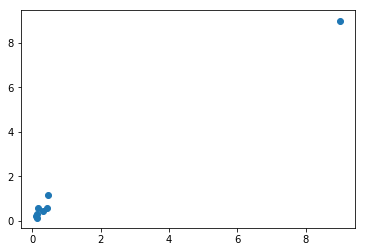

In [93]:
index=list(range(len(Ytrain)))
plt.scatter(Xtrain[1],Xtrain[0])
plt.show()

In [58]:
print(Xtrain)

[[2.201e+01 2.190e+01 1.472e+02 ... 2.432e-01 2.741e-01 8.574e-02]
 [1.720e+01 2.452e+01 1.142e+02 ... 1.899e-01 3.313e-01 1.339e-01]
 [1.513e+01 2.981e+01 9.671e+01 ... 6.575e-02 3.233e-01 6.165e-02]
 ...
 [1.611e+01 1.805e+01 1.051e+02 ... 1.216e-01 2.792e-01 8.158e-02]
 [1.048e+01 1.986e+01 6.672e+01 ... 6.736e-02 2.883e-01 7.748e-02]
 [1.729e+01 2.213e+01 1.144e+02 ... 1.528e-01 3.067e-01 7.484e-02]]
